# Objective of the EDA
Which factors determine the price of a car?\
With what accuracy can the price be predicted\
Can a model trained on all cars be used to accurately predict prices of models with only a few samples?


In [1]:
from pathlib import Path
data_path = Path.cwd().resolve().parent.joinpath("data/all_anonymized_2015_11_2017_03.csv")

In [2]:
import pandas as pd
df = pd.read_csv(data_path, low_memory=False)

In [3]:
df.head(30)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.915376+00,2016-01-27 20:40:15.46361+00,2072.54
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,NaN,None,auto,5,5,diesel,2015-11-14 18:10:06.924123+00,2016-01-27 20:40:15.46361+00,10547.74
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.936239+00,2016-01-27 20:40:15.46361+00,4293.12
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.954319+00,2016-01-27 20:40:15.46361+00,1332.35


In [4]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [6]:
df.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

In [7]:
df['maker'].unique()

array(['ford', 'skoda', 'bmw', nan, 'suzuki', 'nissan', 'opel', 'citroen',
       'seat', 'kia', 'audi', 'rover', 'toyota', 'hyundai', 'fiat',
       'volvo', 'chevrolet', 'mazda', 'jeep', 'mercedes-benz', 'subaru',
       'chrysler', 'lancia', 'smart', 'honda', 'porsche', 'dodge',
       'mitsubishi', 'mini', 'jaguar', 'lexus', 'hummer', 'bentley',
       'tesla', 'maserati', 'isuzu', 'lamborghini', 'lotus', 'volkswagen',
       'peugeot', 'renault', 'alfa-romeo', 'infinity', 'rolls-royce',
       'aston-martin', 'land-rover', 'dacia'], dtype=object)

In [8]:
df['model'].unique()

array(['galaxy', 'octavia', nan, ..., '125d', 'glk200-cdi', '760i'],
      dtype=object)

In [9]:
df['model'].nunique()

1012

In [10]:
df['body_type'].unique()

array([nan, 'van', 'compact', 'transporter', 'coupe', 'convertible',
       'other', 'sedan', 'stationwagon', 'offroad'], dtype=object)

In [11]:
df['color_slug'].unique()

array([nan, 'beige', 'grey', 'blue', 'violet', 'silver', 'black', 'white',
       'red', 'brown', 'bronze', 'yellow', 'orange', 'green', 'gold'],
      dtype=object)

In [12]:
df['fuel_type'].value_counts()

gasoline    902222
diesel      768207
electric     26350
lpg           7403
cng           1124
Name: fuel_type, dtype: int64

In [13]:
df['transmission'].unique()

array(['man', 'auto', nan], dtype=object)

In [14]:
df['door_count'].unique()

array(['5', '3', '4', 'None', '2', '6', '1', '7', nan, '9', '8', '77',
       '58', '54', '0', '55', '22', '45', '17', '49'], dtype=object)

<AxesSubplot:>

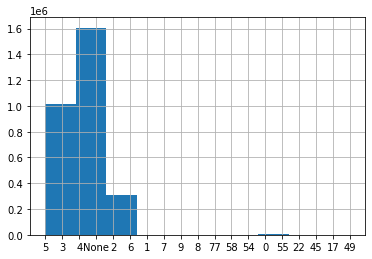

In [15]:
df['door_count'].hist()

In [16]:
df['door_count'].value_counts()

4       1130741
5        894084
None     475693
2        307824
3        120593
0          8010
6          1253
1           273
7            43
55            9
9             4
58            3
8             3
54            1
17            1
77            1
22            1
45            1
49            1
Name: door_count, dtype: int64

In [17]:
df['seat_count'].value_counts()

5       1767868
None     537610
4        244797
7        100744
2         72685
3         33607
6         14174
9         12575
0         11695
8          6754
1           567
17           39
10           35
12           31
14           19
15           19
18           16
19           14
45           13
20           13
21           13
23           13
13           10
50            9
16            9
11            8
55            8
57            7
51            7
58            6
56            5
54            4
25            4
36            3
24            3
52            3
53            3
81            3
29            3
512           2
44            2
33            2
74            2
49            2
32            2
30            2
27            2
26            1
59            1
65            1
43            1
22            1
85            1
515           1
138           1
255           1
517           1
61            1
Name: seat_count, dtype: int64

In [18]:
df['price_eur'].value_counts()

1295.34     673623
9900.00       6609
10900.00      6497
12900.00      6274
11900.00      6169
             ...  
14963.95         1
39794.00         1
925.28           1
10218.25         1
11251.07         1
Name: price_eur, Length: 227305, dtype: int64

There are ~670000 instances of `price_eur` where the value is exactly equal to `1295.34`!

In [19]:
df[df["price_eur"] == 1295.34]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
666,NaN,NaN,138295.0,2002.0,1868.0,51.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:55:39.704374+00,2016-01-27 20:40:15.46361+00,1295.34
947,NaN,NaN,159950.0,2000.0,999.0,37.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:55:49.748804+00,2016-01-27 20:40:15.46361+00,1295.34
1406,NaN,NaN,188000.0,1998.0,1380.0,55.0,NaN,NaN,None,man,3,4,gasoline,2015-11-14 18:56:08.686391+00,2016-01-27 20:40:15.46361+00,1295.34
1485,ford,focus,180500.0,2000.0,1800.0,85.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:56:11.79795+00,2016-01-27 20:40:15.46361+00,1295.34
1535,ford,focus,271825.0,2000.0,1800.0,66.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:56:13.748391+00,2016-01-27 20:40:15.46361+00,1295.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


Taking the minimun `price_eur >= 150`, and removing the instances where `price_eur` is exactly to 1295.34

In [20]:
df = df[df["price_eur"] != 1295.34]
df = df[df["price_eur"] >= 150]

In [21]:
len(df)

2840146

In [22]:
df.isnull().sum()

maker                   463377
model                  1010508
mileage                 176792
manufacture_year        259337
engine_displacement     515216
engine_power            357691
body_type              1122514
color_slug             2804260
stk_year               1133276
transmission            357114
door_count              214350
seat_count              352762
fuel_type              1493871
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

# Feature Engineering

`avg_manufacture_year` grouped by `maker` and `model`

In [23]:
import numpy as np

In [24]:
df_new = df.reset_index(drop=True).copy()

# Manufacture Year
min_year = 1970 # minimum threshold of the year. Lower values will be replaced with the average of manufacture_year
average_years = df_new.loc[df_new["manufacture_year"] >= min_year].groupby(["maker", "model"])["manufacture_year"].\
mean().round().rename("avg_manufacture_year").reset_index() # support column with the average year grouped by maker and model

Filling the missing values with the `avg_manufacture_year`.

In [25]:
df_filtered = df_new.merge(average_years, how="left", on=["maker", "model"]) # merge of the support column with the dataframe
df_filtered.loc[df_new["manufacture_year"] < min_year, "manufacture_year"] = np.nan # force values below the minimum threshold to nan
df_filtered["manufacture_year"] = df_filtered["manufacture_year"].fillna(df_filtered["avg_manufacture_year"]) # fill nan values with the average year
df_filtered = df_filtered[df_filtered['manufacture_year'].notna()].reset_index(drop=True) # delete of those rows that have not manufacture_year valorized yet

In [26]:
df_filtered.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,avg_manufacture_year
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75,2006.0
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31,2008.0
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06,NaN
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77,2008.0
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71,2008.0


In [27]:
# Engine Power
min_engine_power = 50
average = df_filtered.loc[df_filtered["engine_power"] >= min_engine_power].\
groupby(["maker", "model", "manufacture_year"])["engine_power"].mean().round().rename("avg_engine_power").reset_index()

df_filtered2 = df_filtered.merge(average, how="left", on=["maker", "model", "manufacture_year"])
df_filtered2.loc[df_filtered["engine_power"] < min_engine_power, "engine_power"] = np.nan
df_filtered2["engine_power"] = df_filtered2["engine_power"].fillna(df_filtered2["avg_engine_power"])
df_filtered2 = df_filtered2[df_filtered2['engine_power'].notna()].reset_index(drop=True)

In [28]:
# Engine Displacement
min_engine_displacement = 600
average = df_filtered2.loc[df_filtered2["engine_displacement"] >= min_engine_displacement].\
groupby(["maker", "model"])["engine_displacement"].mean().round().rename("avg_engine_displacement").reset_index()

df_filtered3 = df_filtered2.merge(average, how="left", on=["maker", "model"])
df_filtered3.loc[df_filtered2["engine_displacement"] < min_engine_displacement, "engine_displacement"] = np.nan
df_filtered3["engine_displacement"] = df_filtered3["engine_displacement"].fillna(df_filtered3["avg_engine_displacement"])
df_filtered3 = df_filtered3[df_filtered3['engine_displacement'].notna()].reset_index(drop=True)


In [29]:
# Mileage
average = df_filtered3.groupby(["manufacture_year"])["mileage"].mean().\
round().rename("avg_mileage").reset_index() # support column with the average mileage with same manufacture_year

df_filtered4 = df_filtered3.merge(average, how="left", on=["manufacture_year"]) # merge of the support column with the dataframe
df_filtered4["mileage"] = df_filtered4["mileage"].fillna(df_filtered4["avg_mileage"]).reset_index(drop=True) # fill nan values with the average mileage

In [30]:
# Fuel Type
average = df_filtered4.loc[df_filtered4["fuel_type"].notna()].\
groupby(["maker","model"])["fuel_type"].agg(lambda x:x.value_counts().index[0]).\
rename("mode_fuel_type").reset_index() # support column with the most frequent value of fuel_type grouped by maker and model

df_filtered5 = df_filtered4.merge(average, how="left", on=["maker","model"]) # merge of the support column with the dataframe
df_filtered5["fuel_type"] = df_filtered5["fuel_type"].fillna(df_filtered5["mode_fuel_type"]) # fill nan values with the mode of fuel_type
df_filtered5 = df_filtered5[df_filtered5['fuel_type'].notna()].reset_index(drop=True) # delete of those rows that have not fuel_type valorized yet

df_filtered5 = pd.get_dummies(df_filtered5,columns=["fuel_type"]) # get dummies variables of this categorical feature 

df_cleaned = df_filtered5.copy()

# Feature Generation (AD duration)
`date_last_seen` - `date_created` gives the AD duration.

In [31]:
# AD duration
df_cleaned['date_created'] = pd.to_datetime(df_cleaned['date_created']).dt.normalize()
df_cleaned['date_last_seen'] = pd.to_datetime(df_cleaned['date_last_seen']).dt.normalize()
df_cleaned['ad_duration'] = (df_cleaned['date_last_seen'] - df_cleaned['date_created']).dt.days # new feature: how much last the ad

In [32]:
df_cleaned.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,...,date_last_seen,price_eur,avg_manufacture_year,avg_engine_power,avg_engine_displacement,avg_mileage,mode_fuel_type,fuel_type_diesel,fuel_type_gasoline,ad_duration
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,...,2016-01-27 00:00:00+00:00,10584.75,2006.0,111.0,2226.0,93373.0,diesel,1,0,74
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,...,2016-01-27 00:00:00+00:00,8882.31,2008.0,92.0,2021.0,79113.0,gasoline,1,0,74
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,...,2016-01-27 00:00:00+00:00,12065.06,NaN,NaN,NaN,98536.0,NaN,1,0,74
3,skoda,fabia,111970.0,2004.0,1200.0,63.0,NaN,NaN,None,man,...,2016-01-27 00:00:00+00:00,2960.77,2008.0,63.0,1501.0,183176.0,gasoline,0,1,74
4,skoda,fabia,128886.0,2004.0,1200.0,63.0,NaN,NaN,None,man,...,2016-01-27 00:00:00+00:00,2738.71,2008.0,63.0,1501.0,183176.0,gasoline,0,1,74


In [33]:
df_cleaned.isnull().sum()

maker                       234012
model                       414565
mileage                          0
manufacture_year                 0
engine_displacement              0
engine_power                     0
body_type                   939748
color_slug                 2083515
stk_year                    781572
transmission                212919
door_count                  139601
seat_count                  232169
date_created                     0
date_last_seen                   0
price_eur                        0
avg_manufacture_year        414565
avg_engine_power            414565
avg_engine_displacement     414565
avg_mileage                      0
mode_fuel_type              414565
fuel_type_diesel                 0
fuel_type_gasoline               0
ad_duration                      0
dtype: int64

In [34]:
# drop features
features_to_drop = ["model", "door_count", "body_type", "color_slug", "stk_year", "avg_manufacture_year", "date_created", "date_last_seen", "avg_engine_displacement","avg_engine_power","avg_mileage", "mode_fuel_type"]
df_cleaned = df_cleaned.drop(features_to_drop, axis="columns")

In [35]:
df_cleaned.isnull().sum()

maker                  234012
mileage                     0
manufacture_year            0
engine_displacement         0
engine_power                0
transmission           212919
seat_count             232169
price_eur                   0
fuel_type_diesel            0
fuel_type_gasoline          0
ad_duration                 0
dtype: int64

In [36]:
df['seat_count'].value_counts()

5       1545346
None     495646
4        232415
7         87408
2         68284
3         29217
6         12323
9         10501
8          5614
1           361
17           36
10           34
12           31
15           16
14           14
20           13
19           13
23           12
18           12
45           12
13            8
11            8
16            6
55            6
56            5
57            5
50            4
58            4
21            4
54            3
51            3
24            3
25            3
74            2
27            2
0             2
30            1
53            1
65            1
36            1
255           1
61            1
22            1
26            1
Name: seat_count, dtype: int64

In [37]:
# Seat Count
features_to_fillna = ["seat_count"]
for feature in features_to_fillna:
    df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors="coerce") # transform to numeric
    replace_with = df_cleaned[feature].median()                       # deduction of the median
    df_cleaned[feature].fillna(replace_with,inplace=True)             # replace null
    
df_cleaned["seat_str"] = np.select(
    condlist=[
        (df_cleaned["seat_count"] >= 0) & (df_cleaned["seat_count"] < 4),
        (df_cleaned["seat_count"] >= 4) & (df_cleaned["seat_count"] < 6),
        (df_cleaned["seat_count"] >= 6)],
    choicelist=[
        "small",
        "medium",
        "large",
        ],
    default="unknown")
df_cleaned = pd.get_dummies(df_cleaned,columns=["seat_str"])
df_cleaned = df_cleaned.drop(["seat_count"], axis=1)

In [38]:
# Transmission
df_cleaned = df_cleaned[df_cleaned['transmission'].notna()]
df_cleaned = pd.get_dummies(df_cleaned,columns=["transmission"])

In [39]:
# Missing values
print(df_cleaned.isna().sum())

maker                  212900
mileage                     0
manufacture_year            0
engine_displacement         0
engine_power                0
price_eur                   0
fuel_type_diesel            0
fuel_type_gasoline          0
ad_duration                 0
seat_str_large              0
seat_str_medium             0
seat_str_small              0
transmission_auto           0
transmission_man            0
dtype: int64


# Dealing with missing values in Categorical Features

We have now only one categorical feature `maker` left whose missing value is to be filled.

Different Methods for dealing missing values in categorical features
* Delete the entire column maker.
* Replace missing values with the most frequent values.
* Delete rows with null values.
* Predict the missing values with classifiers.


We will use the method "Predicting missing values with RandomForestClassifier"

In [40]:
df_with_maker = df_cleaned[df_cleaned['maker'].notna()]
print("N. rows with maker not null:", df_with_maker.shape[0])

df_no_maker = df_cleaned[df_cleaned['maker'].isna()]
print("N. rows with maker null:", df_no_maker.shape[0])

N. rows with maker not null: 1690193
N. rows with maker null: 212900


In [41]:
df_with_maker.to_csv('with_maker.csv', index=False)
df_no_maker.to_csv('no_maker.csv', index=False)

In [42]:
del df
del df_cleaned
del df_no_maker
del df_with_maker

In [43]:
import gc
gc.collect()

40

In [44]:
import pandas as pd
df_with_maker = pd.read_csv('with_maker.csv')
df_no_maker = pd.read_csv('no_maker.csv')

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
X = df_with_maker.drop("maker", axis=1).values
Y = df_with_maker["maker"].values

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, max_features=0.6, min_samples_leaf=3,
                       n_estimators=45, n_jobs=-1, random_state=False)

In [48]:
y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

In [49]:
accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: TRAIN=0.9396 TEST=0.8883
LOG LOSS: 0.36204943166707043


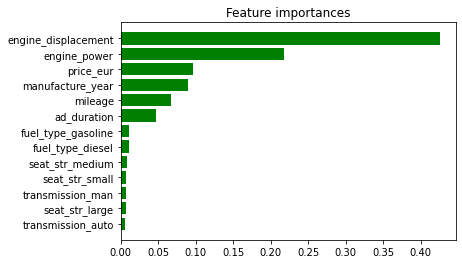

In [50]:
import matplotlib.pyplot as plt
importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_maker.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [51]:
df_no_maker = df_no_maker.drop('maker', axis=1)
prediction = forest.predict(df_no_maker)

df_no_maker.insert(0, 'maker', prediction)

In [52]:
frames = [df_with_maker, df_no_maker]
df_final = pd.concat(frames)
print(df_final.shape[0])

1903093


In [53]:
from scipy import stats
def remove_outliers(dataframe):
    '''
    return a dataframe without rows that are outliers in any column
    '''
    return dataframe\
    .loc[:, lambda df: df.std() > 0.04]\
    .loc[lambda df: (np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [54]:
df_final.head()

,maker,mileage,manufacture_year,engine_displacement,engine_power,price_eur,fuel_type_diesel,fuel_type_gasoline,ad_duration,seat_str_large,seat_str_medium,seat_str_small,transmission_auto,transmission_man
0,ford,151000.0,2011.0,2000.0,103.0,10584.75,1,0,74,1,0,0,0,1
1,skoda,143476.0,2012.0,2000.0,81.0,8882.31,1,0,74,0,1,0,0,1
2,bmw,97676.0,2010.0,1995.0,85.0,12065.06,1,0,74,0,1,0,0,1
3,skoda,111970.0,2004.0,1200.0,63.0,2960.77,0,1,74,0,1,0,0,1
4,skoda,128886.0,2004.0,1200.0,63.0,2738.71,0,1,74,0,1,0,0,1


In [55]:
df_final = pd.get_dummies(df_final,columns=["maker"])

df_final = remove_outliers(df_final)

X = df_final.drop("price_eur", axis=1).values
Y = np.log1p(df_final["price_eur"].values)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 0.08885265366970663
R2 score: 0.8832105031609881


In [57]:
def plot_regression(Y_test, Y_pred):
    '''
    method that plot a linear regression line on a scatter plot
    '''
    x = Y_test
    y = Y_pred

    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.plot(x, y, 'o')

    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b)

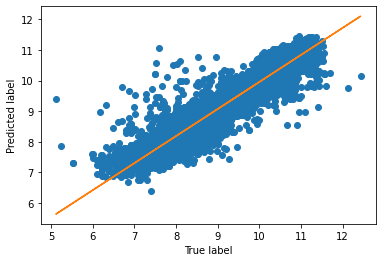

In [58]:
plot_regression(Y_test, Y_pred)